In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *


#from sklearn.model_selection import train_test_split
#from sklearn import preprocessing


In [2]:
X = np.load('trackTrainImages.npy')
y = np.load('trackPos.npy')

print(X.shape)
print(y.shape)


(550, 20, 224, 3)
(550,)


In [3]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X
y_train = y


X_test = X
y_test = y

In [4]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
# split the training data into a training set and a validation set
X_train, X_valid = X_train[:-100], X_train[-100:]
y_train, y_valid = y_train[:-100], y_train[-100:]

In [6]:
# create the MLP model
inputs = Input(shape=(20,224,3))

conv2D_1 = Conv2D(filters=15,kernel_size=3,strides=1,activation='relu')(inputs)
maxPool_1 = MaxPooling2D(pool_size=2,strides=2)(conv2D_1)
batch_1 = BatchNormalization()(maxPool_1)


conv2D_2 = Conv2D(filters=15,kernel_size=2,strides=1,activation='relu')(batch_1)
maxPool_2 = MaxPooling2D(pool_size=2,strides=1)(conv2D_2)
batch_2 = BatchNormalization()(maxPool_2)

conv2D_3 = Conv2D(filters=15,kernel_size=3,strides=1,activation='relu')(batch_2)
maxPool_3 = MaxPooling2D(pool_size=2,strides=1)(conv2D_3)
batch_3 = BatchNormalization()(maxPool_3)

conv2D_4 = Conv2D(filters=15,kernel_size=3,strides=1,activation='relu')(batch_3)
maxPool_4 = MaxPooling2D(pool_size=2,strides=1)(conv2D_4)
batch_4 = BatchNormalization()(maxPool_4)


flat = Flatten()(batch_4)
dense_1 = Dense(units=64,activation='relu')(flat)
outputs = Dense(units=1,activation='linear')(dense_1)

model = keras.Model(inputs,outputs)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20, 224, 3)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 18, 222, 15)       420       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 111, 15)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 9, 111, 15)        60        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 110, 15)        915       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 109, 15)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 109, 15)        60    

In [8]:
# comile the model unsing categorical_crossentropy loss function
model.compile(optimizer='nadam',loss='MSE',metrics=['mae', 'mse'])

In [9]:
# train the model using a mini batch size of 100 images and 50 epochs
history = model.fit(X_train, y_train, epochs=100, batch_size=20,validation_data=[X_valid, y_valid])

Train on 450 samples, validate on 100 samples
Epoch 1/100
450/450 [==============================] - 24s 54ms/sample - loss: 7057.9654 - mean_absolute_error: 68.4795 - mean_squared_error: 7057.9648 - val_loss: 18215.6480 - val_mean_absolute_error: 127.3737 - val_mean_squared_error: 18215.6484
Epoch 2/100
450/450 [==============================] - 3s 7ms/sample - loss: 2017.1509 - mean_absolute_error: 38.4756 - mean_squared_error: 2017.1509 - val_loss: 18515.0477 - val_mean_absolute_error: 128.5724 - val_mean_squared_error: 18515.0469
Epoch 3/100
450/450 [==============================] - 3s 7ms/sample - loss: 1228.5999 - mean_absolute_error: 28.6835 - mean_squared_error: 1228.5997 - val_loss: 18601.0215 - val_mean_absolute_error: 128.9926 - val_mean_squared_error: 18601.0195
Epoch 4/100
450/450 [==============================] - 3s 7ms/sample - loss: 707.0131 - mean_absolute_error: 20.7273 - mean_squared_error: 707.0131 - val_loss: 17722.3455 - val_mean_absolute_error: 125.5326 - val_m

In [10]:
# evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(X_test, y_test, batch_size=100)
print('test loss, test mse:', results)


# Evaluate on test data
550/550 [==============================] - 3s 5ms/sample - loss: 69.1333 - mean_absolute_error: 5.3561 - mean_squared_error: 69.1333
test loss, test mse: [69.13332479650325, 5.356071, 69.13332]


KeyError: 'mse'

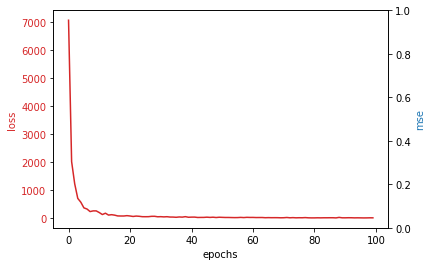

In [11]:
# summarize history for accuracy and loss as a function of the epochs
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss', color=color)
ax1.plot(history.history['loss'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('mse', color=color)  # we already handled the x-label with ax1
ax2.plot(history.history['mse'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [12]:
y_pred = model.predict(X_train)

In [13]:
for i in range(len(y_train)):
    
    print('Actual : '+ str(y_train[i])+' -- Pres : '+str(y_pred[i]))

Actual : 107.0 -- Pres : [109.14441]
Actual : 107.6 -- Pres : [109.74423]
Actual : 107.6 -- Pres : [107.86649]
Actual : 107.6 -- Pres : [107.044975]
Actual : 107.6 -- Pres : [107.71019]
Actual : 107.6 -- Pres : [108.222015]
Actual : 107.6 -- Pres : [108.60607]
Actual : 107.6 -- Pres : [106.16433]
Actual : 107.6 -- Pres : [108.107834]
Actual : 107.6 -- Pres : [105.370674]
Actual : 107.6 -- Pres : [106.39687]
Actual : 107.6 -- Pres : [106.042175]
Actual : 107.6 -- Pres : [106.27174]
Actual : 107.6 -- Pres : [106.18567]
Actual : 107.6 -- Pres : [105.82971]
Actual : 107.6 -- Pres : [107.30092]
Actual : 107.6 -- Pres : [107.71571]
Actual : 107.6 -- Pres : [108.96794]
Actual : 107.6 -- Pres : [109.32758]
Actual : 107.6 -- Pres : [106.8824]
Actual : 107.6 -- Pres : [107.69978]
Actual : 107.6 -- Pres : [106.090675]
Actual : 107.6 -- Pres : [108.41795]
Actual : 109.0 -- Pres : [110.19004]
Actual : 109.0 -- Pres : [110.74855]
Actual : 103.0 -- Pres : [100.875854]
Actual : 93.0 -- Pres : [92.4187

In [14]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('racerModel2.h5') 

In [16]:
X = X_test[0]

In [17]:
XX = np.array([X])

In [18]:
XX.shape

(1, 20, 224, 3)

In [19]:
y_pred = model.predict(XX)

In [20]:
y_pred[0][0]

109.1444

In [20]:
y_train[0]

107.0

In [16]:
new_model = tf.keras.models.load_model('saved_model/my_model')


In [22]:
y_pred = new_model.predict(XX)
y_pred[0][0]

117.16452

In [15]:
# Recreate the exact same model, including its weights and the optimizer
model2 = tf.keras.models.load_model('racerModel2.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [22]:
y_pred = model2.predict(XX)
y_pred[0][0]

109.1444